# Tarefa 1 - Heart Attack Risk Prediction

### O Dataset
O Dataset <em>heart_attack_prediction_dataset.csv</em> tem como objetivo explorar as dinâmicas que influenciam a saúde do coração e os fatores que o preditam. 

Este dataset é constituído pelos seguintes parâmetros:

- **Patient ID** - Identificador único para cada paciente;

- **Age** - Idade do paciente;
- **Sex** - Género do paciente (Male/Female);
- **Cholesterol** - Níveis de colesterol do paciente;
- **Blood Pressure** - Pressão sanguínea do paciente (systolic/diastolic);
- **Heart Rate** - Frequência cardíaca do paciente;
- **Diabetes** - Se o paciente tem diabetes (Yes/No);
- **Family History** - Histórico familiar de doenças cardíacas (1: Sim, 0: Não);
- **Smoking** - Estado de fumador do paciente (1: Fumador, 0: Não Fumador);
- **Obesity** - Estado de obesidade do paciente (1: Obeso, 0: Não obeso);
- **Alcohol Consumption** - Se o paciente consome álcool (1: Sim, 0: Não);
- **Exercise Hours Per Week** - Número de horas de exercício por semana;
- **Diet** - Hábitos de alimentação do paciente (Healthy/Average/Unhealthy);
- **Previous Heart Problems** - Existência de histórico de problemas cardíacos (1: Sim, 0: Não);
- **Medication Use** - Uso de medicação por parte do paciente (1: Sim, 0: Não);
- **Stress Level** - Níveis de stress reportados pelo paciente (1-10);
- **Sedentary Hours Per Day** - Horas de atividade sedentária por dia;
- **Income** - Nível de rendimento do paciente;
- **BMI** - Índice de massa corporal do paciente;
- **Triglycerides** - Níveis de triglicerídeos do paciente;
- **Physical Activity Days Per Week** - Dias de atividade física por semana;
- **Sleep Hours Per Day** - Horas de sono por dia;
- **Country** - País do paciente;
- **Continent** - Continente onde o paciente reside;
- **Hemisphere** - Hemisfério onde o paciente reside;
- **Heart Attack Risk** - Presença de risco de ataque cardíaco (1 : Sim, 0: Não);

## Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

Iniciamos o estudo do dataset pelo load dos dados numa dataframe panda.

In [33]:
data = pd.read_csv('heart_attack_prediction_dataset.csv')

Imprimimos as primeiras linhas do dataframe.

In [34]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Em seguida, geramos as estatísticas descritivas:

In [35]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


De forma a obtermos um resumo da informação (número de valores não nulos em cada coluna, o tipo de dados de cada coluna e o uso de memória) contida no Dataframe:

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Verificamos se existem valores duplicados:

In [37]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]


## Data Treatment

Remoção do atributo **Patient ID** por ser um atributo único em todos os registos.

In [38]:
data.drop(columns=['Patient ID'], inplace=True)

#### Label encoding do atributo **sex**

0 - Female

1 - Male

In [39]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data['Sex'] = lb.fit_transform(data['Sex'])

data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,1,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,0,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,1,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,1,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#### Diet Treatment

0 - Unhealthy

1 - Average

2 - Healthy

In [40]:
print(data['Diet'].head())
replace_map = {'Diet': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2}}
predefined_order = ['Unhealthy', 'Average', 'Healthy']

labels = data['Diet'].astype('category').cat.categories.tolist()
labels = sorted(labels, key=lambda x: predefined_order.index(x))

replace_map_comp = {'Diet' : {k: v for k,v in zip(labels,list(range(len(labels))))}} 

data.replace(replace_map_comp, inplace=True)
data['Diet'].head()

0      Average
1    Unhealthy
2      Healthy
3      Average
4    Unhealthy
Name: Diet, dtype: object


0    1
1    0
2    2
3    1
4    0
Name: Diet, dtype: int64

#### Blood Presure Treatment

In [41]:
systolic = []
diastolic = []

for bp in data['Blood Pressure']:
    systolic.append(int(bp.split('/')[0]))
    diastolic.append(int(bp.split('/')[1]))

data.drop(columns=['Blood Pressure'], inplace=True)

data['Blood Pressure Systolic'] = systolic
data['Blood Pressure Diastolic'] = diastolic

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

#### Country, Continent and Hemisphere Treatment

In [42]:
# data['Country'] = lb.fit_transform(data['Country'])
# data['Continent'] = lb.fit_transform(data['Continent'])
# data['Hemisphere'] = lb.fit_transform(data['Hemisphere'])

columns_to_drop = ["Country", "Continent", "Hemisphere"]
data = data.drop(columns=columns_to_drop)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

## Modeling

### Split Features

In [43]:
from sklearn.model_selection import train_test_split

X = data[data.drop(columns=['Heart Attack Risk']).columns]
y = data['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023, stratify=y)


### Feature Selection

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=2023)
model.fit(X, y)
feature_importances = model.feature_importances_

features_to_drop = []
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

    if importance < 0.01:
        features_to_drop.append(feature)

Age: 0.0836986497341675
Sex: 0.00721010964832542
Cholesterol: 0.07037266480611785
Heart Rate: 0.07997932210604199
Diabetes: 0.013809750431946724
Family History: 0.008722229139669897
Smoking: 0.005203983165950672
Obesity: 0.007991976012570711
Alcohol Consumption: 0.010792415192096496
Exercise Hours Per Week: 0.09077314324340055
Diet: 0.018750456269214892
Previous Heart Problems: 0.008633926041553991
Medication Use: 0.007402360951888433
Stress Level: 0.04203661743831601
Sedentary Hours Per Day: 0.08139878973173587
Income: 0.08455900451444319
BMI: 0.09020724938541218
Triglycerides: 0.08165168546000827
Physical Activity Days Per Week: 0.030937118152666757
Sleep Hours Per Day: 0.03858464593899656
Blood Pressure Systolic: 0.06503138263105837
Blood Pressure Diastolic: 0.07225252000441776


#### Droping columns with less importance

In [25]:
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)


X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6572 entries, 6493 to 7525
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              6572 non-null   int64  
 1   Cholesterol                      6572 non-null   int64  
 2   Heart Rate                       6572 non-null   int64  
 3   Diabetes                         6572 non-null   int64  
 4   Alcohol Consumption              6572 non-null   int64  
 5   Exercise Hours Per Week          6572 non-null   float64
 6   Diet                             6572 non-null   int64  
 7   Stress Level                     6572 non-null   int64  
 8   Sedentary Hours Per Day          6572 non-null   float64
 9   Income                           6572 non-null   int64  
 10  BMI                              6572 non-null   float64
 11  Triglycerides                    6572 non-null   int64  
 12  Physical Activity Days

#### Normalize

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


scaler.fit(X_test)
X_test = scaler.transform(X_test)

### Prepare Metrics and Model Selection

In [45]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Árvore de decisão

#### Hold-out Validation

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1406
           1       0.33      0.33      0.33       785

    accuracy                           0.52      2191
   macro avg       0.48      0.48      0.48      2191
weighted avg       0.52      0.52      0.52      2191



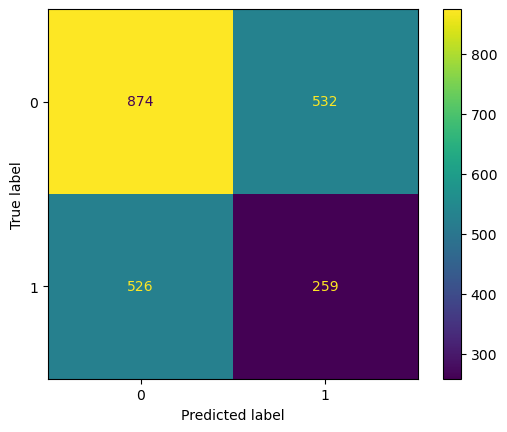

In [227]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=2023)
dtc.fit(X_train, y_train)
predictionDTC = dtc.predict(X_test)


print(classification_report(y_test, predictionDTC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionDTC)
plt.show()

#### Cross Validation

In [57]:
scores = cross_val_score(dtc, X, y, cv=10)
scores

array([0.51653364, 0.52223489, 0.53249715, 0.55022831, 0.53652968,
       0.55936073, 0.52853881, 0.53082192, 0.54109589, 0.52511416])

#### GridSearch

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.357 total time=   0.0s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.344 total time=   0.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.396 total time=   0.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.376 total time=   0.0s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.365 total time=   0.0s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.335 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.321 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.357 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.359 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.393 total time=   0.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.338 total time=   0.0s
[CV 2/5] END ..criterion=entropy, splitter=best;,

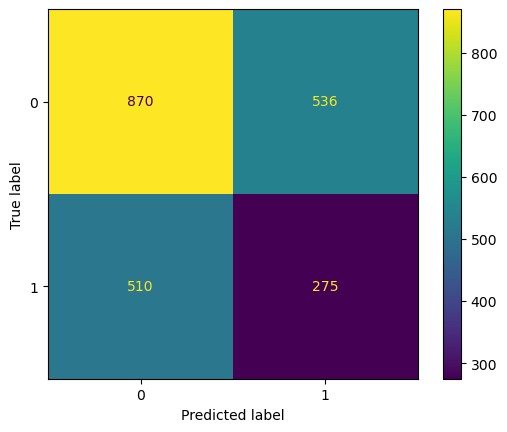

In [157]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

scoring = 'recall'

grid_searchDTC = GridSearchCV(dtc, param_grid, cv=5, refit=True, verbose=3, scoring=scoring)
grid_searchDTC.fit(X_train, y_train)
grid_predictionDTC = grid_searchDTC.predict(X_test)


print("Best estimator: ", grid_searchDTC.best_estimator_)


print(classification_report(y_test, grid_predictionDTC))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionDTC)
plt.show()

### Regressão Linear

#### Hold-out Validation

In [158]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=2023)

dtr.fit(X_train, y_train)
predictionDTR = dtr.predict(X_test)

Mean Absolute Error: 0.4705613874942948

Mean Squared Error: 0.4705613874942948

Root Mean Squared Error: 0.6859747717622674
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1406
           1       0.35      0.37      0.36       785

    accuracy                           0.53      2191
   macro avg       0.49      0.49      0.49      2191
weighted avg       0.53      0.53      0.53      2191



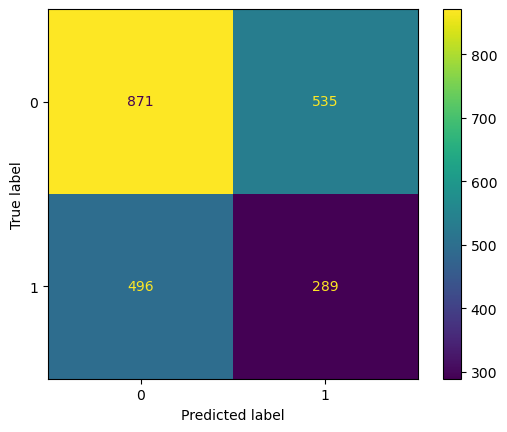

In [159]:
print('Mean Absolute Error: ',end='')
print(mean_absolute_error(y_test, predictionDTR))

print('\nMean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=True))

print('\nRoot Mean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionDTR, squared=False))


print(classification_report(y_test, predictionDTR))
ConfusionMatrixDisplay.from_predictions(y_test, predictionDTR)
plt.show()

#### Cross Validation

In [19]:
scores = cross_val_score(dtr, X, y, cv=10)
scores

array([-1.02983023, -1.08951668, -0.92141082, -1.07010833, -1.09499736,
       -1.01906598, -0.89550867, -0.90707672, -0.94959974, -1.11902778])

#### GridSearch

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END criterion=squared_error, splitter=best;, score=0.383 total time=   0.0s
[CV 2/5] END criterion=squared_error, splitter=best;, score=0.366 total time=   0.0s
[CV 3/5] END criterion=squared_error, splitter=best;, score=0.347 total time=   0.0s
[CV 4/5] END criterion=squared_error, splitter=best;, score=0.377 total time=   0.0s
[CV 5/5] END criterion=squared_error, splitter=best;, score=0.391 total time=   0.0s
[CV 1/5] END criterion=squared_error, splitter=random;, score=0.363 total time=   0.0s
[CV 2/5] END criterion=squared_error, splitter=random;, score=0.407 total time=   0.0s
[CV 3/5] END criterion=squared_error, splitter=random;, score=0.397 total time=   0.0s
[CV 4/5] END criterion=squared_error, splitter=random;, score=0.345 total time=   0.0s
[CV 5/5] END criterion=squared_error, splitter=random;, score=0.420 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, splitter=best;, score=0.383 total time=   0

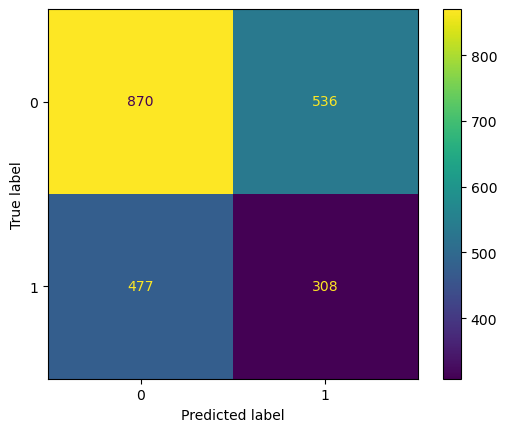

In [160]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random']
}

scoring = 'recall'

grid_searchDTR = GridSearchCV(dtr, param_grid, cv=5, refit=True, verbose=3, scoring=scoring)
grid_searchDTR.fit(X_train, y_train)
grid_predictionDTR = grid_searchDTR.predict(X_test)


print("Best estimator: ", grid_searchDTR.best_estimator_)


print(classification_report(y_test, grid_predictionDTR))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionDTR)
plt.show()

### Support Vector Classifier

#### Hold-out Validation

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1406
           1       0.00      0.00      0.00       785

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191



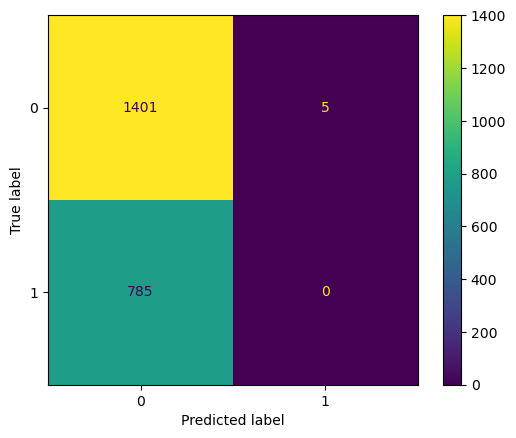

In [21]:
from sklearn.svm import SVC

svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
predictionSVC = svc.predict(X_test)

print(classification_report(y_test, predictionSVC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionSVC)
plt.show()

#### Cross Validation

In [22]:
scores = cross_val_score(svc, X, y, cv=10)
scores

array([0.64196123, 0.64424173, 0.64196123, 0.64269406, 0.64269406,
       0.64155251, 0.64041096, 0.64041096, 0.64155251, 0.64155251])

#### GridSearch

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.111 total time=   0.3s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.113 total time=   0.3s
[CV 1/2] END .......C=1, gamma=0.1, kernel=poly;, score=0.347 total time=   0.6s
[CV 2/2] END .......C=1, gamma=0.1, kernel=poly;, score=0.338 total time=   0.6s
Best estimator:  SVC(C=1, gamma=0.1, kernel='poly', random_state=2023)
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1406
           1       0.34      0.28      0.31       785

    accuracy                           0.55      2191
   macro avg       0.49      0.49      0.48      2191
weighted avg       0.53      0.55      0.53      2191



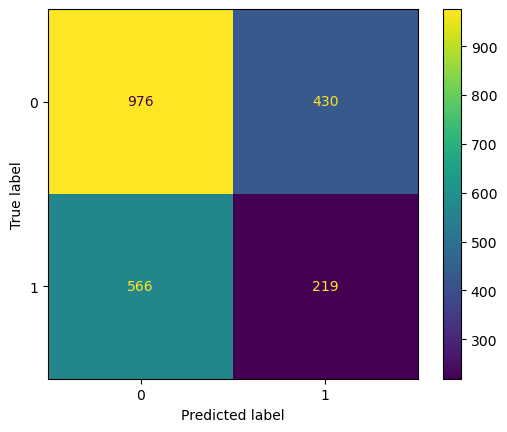

In [23]:
param_grid = {
    'C': [0.1, 1], 
    'gamma': [0.1],
    'kernel': ['poly']
}

scoring = 'recall'

grid_searchSVC = GridSearchCV(svc, param_grid, cv=2, refit=True, verbose=3, scoring=scoring)
grid_searchSVC.fit(X_train, y_train)
grid_predictionSVC = grid_searchSVC.predict(X_test)


print("Best estimator: ", grid_searchSVC.best_estimator_)


print(classification_report(y_test, grid_predictionSVC))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionSVC)
plt.show()

### Support Vector Regressor

#### Hold-out Validation

Mean Absolute Error: 0.4367992023545437

Mean Squared Error: 0.2793705803443552

Root Mean Squared Error: 0.5285551819293376
              precision    recall  f1-score   support

           0       0.64      0.91      0.75      1406
           1       0.32      0.08      0.12       785

    accuracy                           0.61      2191
   macro avg       0.48      0.49      0.44      2191
weighted avg       0.52      0.61      0.52      2191



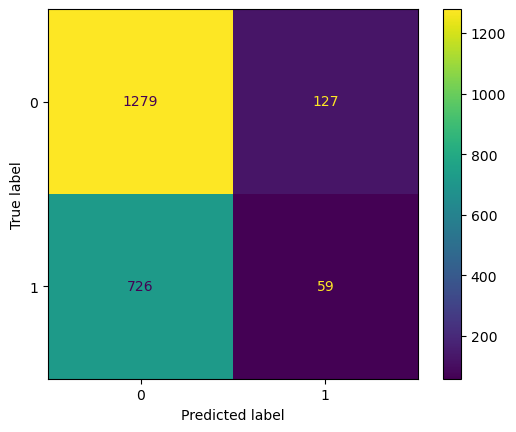

In [24]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
predictionSVR = svr.predict(X_test)

print('Mean Absolute Error: ',end='')
print(mean_absolute_error(y_test, predictionSVR))

print('\nMean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionSVR, squared=True))

print('\nRoot Mean Squared Error: ', end='')
print(mean_squared_error(y_test, predictionSVR, squared=False))


predictionSVR = list(map(round,predictionSVR))
print(classification_report(y_test, predictionSVR))
ConfusionMatrixDisplay.from_predictions(y_test, predictionSVR)
plt.show()

#### Cross Validation

In [25]:
scores = cross_val_score(svr, X, y, cv=10)
scores

array([-0.18167821, -0.2138393 , -0.25433167, -0.18344761, -0.22037465,
       -0.20815477, -0.2128858 , -0.26182079, -0.19994861, -0.18361501])

#### GridSearch

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.389 total time=   3.9s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.421 total time=   4.8s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.111 total time=   0.3s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.113 total time=   0.3s
[CV 1/2] END .........C=1, gamma=1, kernel=poly;, score=0.389 total time=   3.9s
[CV 2/2] END .........C=1, gamma=1, kernel=poly;, score=0.421 total time=   4.8s
[CV 1/2] END .......C=1, gamma=0.1, kernel=poly;, score=0.347 total time=   0.5s
[CV 2/2] END .......C=1, gamma=0.1, kernel=poly;, score=0.338 total time=   0.5s
Best estimator:  SVC(C=0.1, gamma=1, kernel='poly', random_state=2023)
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1406
           1       0.34      0.34      0.34       785

    accuracy                           0.53      2191
   m

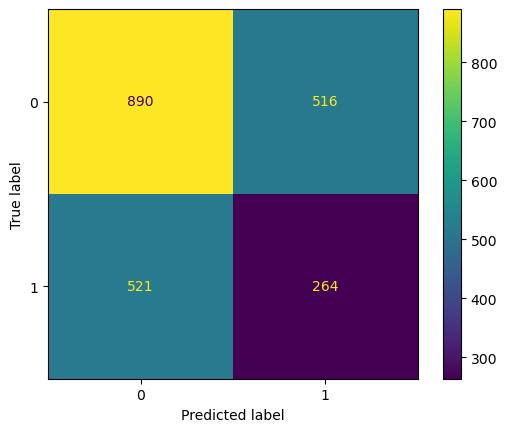

In [26]:
param_grid = {
    'C': [0.1, 1], 
    'gamma': [1, 0.1],
    'kernel': ['poly'],
}

scoring = 'recall'

grid_searchSVR = GridSearchCV(svc, param_grid, cv=2, refit=True, verbose=3, scoring=scoring)
grid_searchSVR.fit(X_train, y_train)
grid_predictionSVR = grid_searchSVR.predict(X_test)


print("Best estimator: ", grid_searchSVR.best_estimator_)


grid_predictionSVR = list(map(round,grid_predictionSVR))
print(classification_report(y_test, grid_predictionSVR))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionSVR)
plt.show()

### Gradient Boosting Machines

#### Hold-out Validation

              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1406
           1       0.40      0.02      0.04       785

    accuracy                           0.64      2191
   macro avg       0.52      0.50      0.41      2191
weighted avg       0.56      0.64      0.51      2191



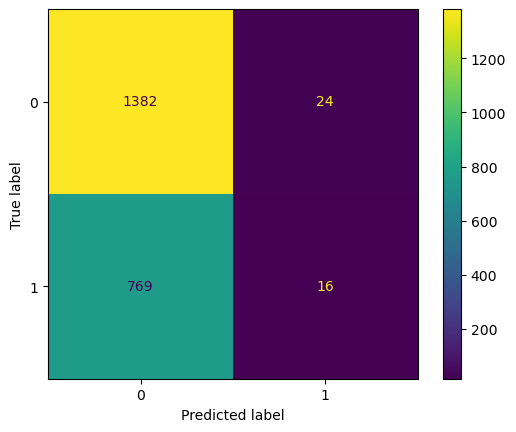

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=2023)
gbm.fit(X_train, y_train)
predictionGBM = gbm.predict(X_test)

print(classification_report(y_test, predictionGBM))
ConfusionMatrixDisplay.from_predictions(y_test, predictionGBM)
plt.show()

#### Cross Validation

In [28]:
scores = cross_val_score(gbm, X, y, cv=10)
scores

array([0.64652223, 0.63283922, 0.63511973, 0.6347032 , 0.64155251,
       0.6369863 , 0.6369863 , 0.64155251, 0.63812785, 0.63812785])

#### Grid Search

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END learning_rate=2, max_depth=4, n_estimators=100;, score=0.713 total time=   1.6s
[CV 2/3] END learning_rate=2, max_depth=4, n_estimators=100;, score=0.420 total time=   1.7s
[CV 3/3] END learning_rate=2, max_depth=4, n_estimators=100;, score=0.680 total time=   1.6s
[CV 1/3] END learning_rate=2, max_depth=4, n_estimators=150;, score=0.713 total time=   2.5s
[CV 2/3] END learning_rate=2, max_depth=4, n_estimators=150;, score=0.420 total time=   2.6s
[CV 3/3] END learning_rate=2, max_depth=4, n_estimators=150;, score=0.680 total time=   2.5s
[CV 1/3] END learning_rate=2, max_depth=5, n_estimators=100;, score=0.447 total time=   2.2s
[CV 2/3] END learning_rate=2, max_depth=5, n_estimators=100;, score=0.561 total time=   2.1s
[CV 3/3] END learning_rate=2, max_depth=5, n_estimators=100;, score=0.392 total time=   2.1s
[CV 1/3] END learning_rate=2, max_depth=5, n_estimators=150;, score=0.447 total time=   3.3s
[CV 2/3] 

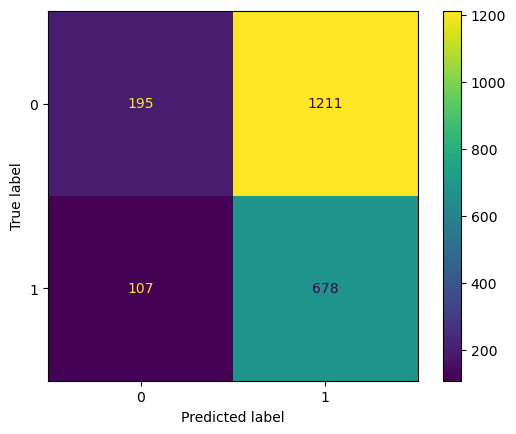

In [29]:
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [2, 1, 0.1],
    'max_depth': [4, 5, 6],
}

scoring = 'recall'

grid_searchGBM = GridSearchCV(gbm, param_grid, cv=3, refit=True, verbose=3, scoring=scoring)
grid_searchGBM.fit(X_train, y_train)
grid_predictionGBM = grid_searchGBM.predict(X_test)


print("Best estimator: ", grid_searchGBM.best_estimator_)


print(classification_report(y_test, grid_predictionGBM))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionGBM)
plt.show()

### Random Forest

#### Hold-out Validation

              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1406
           1       0.42      0.03      0.05       785

    accuracy                           0.64      2191
   macro avg       0.53      0.50      0.41      2191
weighted avg       0.56      0.64      0.52      2191



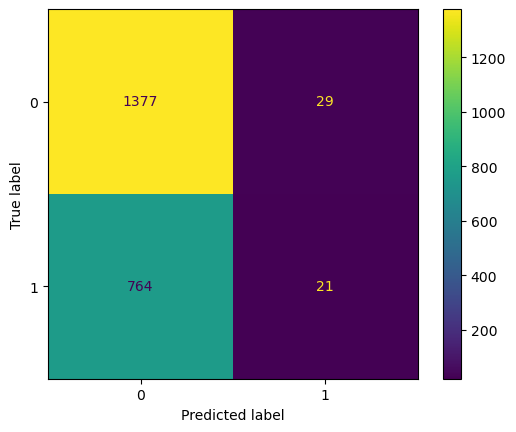

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
predictionRFC = rfc.predict(X_test)

print(classification_report(y_test, predictionRFC))
ConfusionMatrixDisplay.from_predictions(y_test, predictionRFC)
plt.show()

#### Cross Validation

In [31]:
scores = cross_val_score(rfc, X, y, cv=10)
scores

array([0.63968073, 0.63283922, 0.63055872, 0.63812785, 0.63584475,
       0.63127854, 0.63584475, 0.64269406, 0.63242009, 0.63926941])

#### Grid Search

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..criterion=gini, n_estimators=100;, score=0.029 total time=   1.0s
[CV 2/3] END ..criterion=gini, n_estimators=100;, score=0.031 total time=   0.9s
[CV 3/3] END ..criterion=gini, n_estimators=100;, score=0.033 total time=   0.9s
[CV 1/3] END ..criterion=gini, n_estimators=200;, score=0.014 total time=   2.0s
[CV 2/3] END ..criterion=gini, n_estimators=200;, score=0.013 total time=   2.0s
[CV 3/3] END ..criterion=gini, n_estimators=200;, score=0.020 total time=   1.9s
[CV 1/3] END ..criterion=gini, n_estimators=300;, score=0.009 total time=   3.0s
[CV 2/3] END ..criterion=gini, n_estimators=300;, score=0.010 total time=   3.0s
[CV 3/3] END ..criterion=gini, n_estimators=300;, score=0.015 total time=   2.9s
[CV 1/3] END criterion=entropy, n_estimators=100;, score=0.027 total time=   1.2s
[CV 2/3] END criterion=entropy, n_estimators=100;, score=0.020 total time=   1.2s
[CV 3/3] END criterion=entropy, n_estimators=10

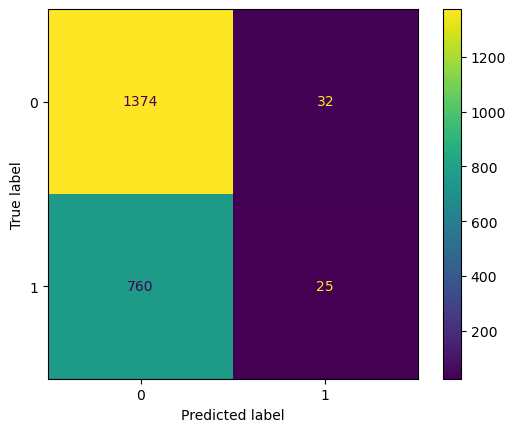

In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
}

scoring = 'recall'

grid_searchRFC = GridSearchCV(rfc, param_grid, cv=3, refit=True, verbose=3, scoring=scoring)
grid_searchRFC.fit(X_train, y_train)
grid_predictionRFC = grid_searchRFC.predict(X_test)


print("Best estimator: ", grid_searchRFC.best_estimator_)


print(classification_report(y_test, grid_predictionRFC))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionRFC)
plt.show()

### Neural Network Models

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1406
           1       0.35      0.28      0.31       785

    accuracy                           0.56      2191
   macro avg       0.49      0.50      0.49      2191
weighted avg       0.54      0.56      0.54      2191



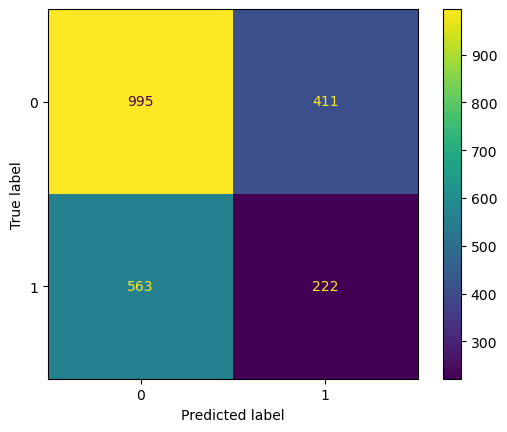

In [228]:
from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(50), max_iter=100000, random_state=2023)
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate='invscaling', solver='sgd')

mlp.fit(X_train, y_train)
predictionMLP = mlp.predict(X_test)

print(classification_report(y_test, predictionMLP))
ConfusionMatrixDisplay.from_predictions(y_test, predictionMLP)
plt.show()

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END activation=relu, alpha=0.005, hidden_layer_sizes=(30, 30), learning_rate=invscaling, max_iter=100000, random_state=2023, solver=sgd;, score=0.332 total time=   0.0s
[CV 2/2] END activation=relu, alpha=0.005, hidden_layer_sizes=(30, 30), learning_rate=invscaling, max_iter=100000, random_state=2023, solver=sgd;, score=0.286 total time=   0.0s
[CV 1/2] END activation=relu, alpha=0.005, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=100000, random_state=2023, solver=sgd;, score=0.473 total time=   0.1s
[CV 2/2] END activation=relu, alpha=0.005, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=100000, random_state=2023, solver=sgd;, score=0.447 total time=   0.1s
[CV 1/2] END activation=relu, alpha=0.005, hidden_layer_sizes=(25, 25, 25), learning_rate=invscaling, max_iter=100000, random_state=2023, solver=sgd;, score=0.009 total time=   0.0s
[CV 2/2] END activation=relu, alpha=0.005, hi

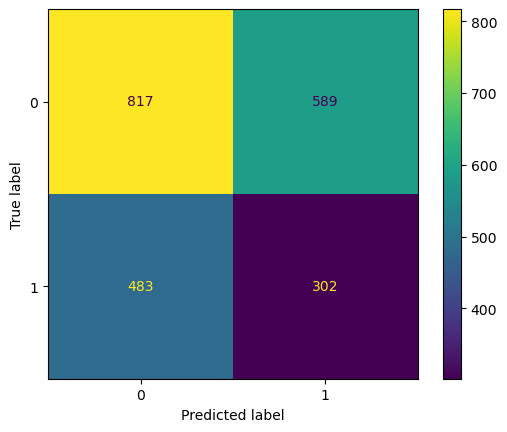

In [229]:
param_grid = {
    'hidden_layer_sizes': [(30, 30), (50, 50), (25, 25, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd'],
    'alpha': [0.005, 0.001],
    'learning_rate': ['invscaling'],
    'max_iter': [100000],
    'random_state': [2023]
}

scoring = 'recall'

grid_searchMLP = GridSearchCV(mlp, param_grid, cv=2, refit=True, verbose=3, scoring=scoring)
grid_searchMLP.fit(X_train, y_train)
grid_predictionMLP = grid_searchMLP.predict(X_test)


print("Best estimator: ", grid_searchMLP.best_estimator_)


print(classification_report(y_test, grid_predictionMLP))
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionMLP)
plt.show()

### Multilayer Perceptron

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

#### Build Model

In [47]:
def build_model(activation = 'sigmoid', learning_rate = 0.001, input_dim=22): # To get input_dim: X.shape[1]
    model = Sequential()
    model.add(Dense(8, input_dim=input_dim, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(1, activation=activation)) #output

    # Compile the model

    model.compile(
        loss = 'binary_crossentropy',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['accuracy', tf.keras.metrics.Recall()]
    )
    return model

In [48]:
model = build_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 8)                 184       
                                                                 
 dense_49 (Dense)            (None, 4)                 36        
                                                                 
 dense_50 (Dense)            (None, 1)                 5         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


#### Grid Search

In [74]:
from sklearn.model_selection import KFold

optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

kf = KFold(n_splits=5, shuffle=True, random_state=2021)

model = KerasRegressor(model = build_model, batch_size=16, epochs=20, validation_split = 0.2)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'neg_mean_absolute_error', verbose=1)

Fit the Model

In [75]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/20
263/263 [==============================] - 2s 6ms/step - loss: 0.6601 - accuracy: 0.6428 - recall_67: 0.0000e+00 - val_loss: 0.6597 - val_accuracy: 0.6274 - val_recall_67: 0.0000e+00
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 0.6517 - accuracy: 0.6428 - recall_67: 0.0000e+00 - val_loss: 0.6602 - val_accuracy: 0.6274 - val_recall_67: 0.0000e+00
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 0.6516 - accuracy: 0.6428 - recall_67: 0.0000e+00 - val_loss: 0.6598 - val_accuracy: 0.6274 - val_recall_67: 0.0000e+00
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 0.6514 - accuracy: 0.6428 - recall_67: 0.0000e+00 - val_loss: 0.6596 - val_accuracy: 0.6274 - val_recall_67: 0.0000e+00
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 0.6514 - accuracy: 0.6428 - recall_67: 0.0000e+00 - val_loss: 0.6595 - val_accuracy: 0.627

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=16, epochs=20, model=<function build_model at 0x7f6653b78160>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             scoring='neg_mean_absolute_error', verbose=1)

In [76]:
print('Best: %f using %s' % (grid_search.best_score_, grid_search.best_params_))

Best: -0.459199 using {'optimizer': 'SGD'}


In [77]:
best_mlp_model_2 = grid_search.best_estimator_
print(best_mlp_model_2)

KerasRegressor(
	model=<function build_model at 0x7f6653b78160>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=16
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


In [78]:
best_mlp_model_2.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20
411/411 [==============================] - 3s 6ms/step - loss: 0.6531 - accuracy: 0.6418 - recall_83: 0.0000e+00 - val_loss: 0.6523 - val_accuracy: 0.6417 - val_recall_83: 0.0000e+00
Epoch 2/20
411/411 [==============================] - 2s 6ms/step - loss: 0.6526 - accuracy: 0.6418 - recall_83: 0.0000e+00 - val_loss: 0.6524 - val_accuracy: 0.6417 - val_recall_83: 0.0000e+00
Epoch 3/20
411/411 [==============================] - 2s 6ms/step - loss: 0.6524 - accuracy: 0.6418 - recall_83: 0.0000e+00 - val_loss: 0.6524 - val_accuracy: 0.6417 - val_recall_83: 0.0000e+00
Epoch 4/20
411/411 [==============================] - 2s 6ms/step - loss: 0.6523 - accuracy: 0.6418 - recall_83: 0.0000e+00 - val_loss: 0.6525 - val_accuracy: 0.6417 - val_recall_83: 0.0000e+00
Epoch 5/20
411/411 [==============================] - 2s 5ms/step - loss: 0.6521 - accuracy: 0.6418 - recall_83: 0.0000e+00 - val_loss: 0.6526 - val_accuracy: 0.6417 - val_recall_83: 0.0000e+00
Epoch 6/20
411/411 [==========

KerasRegressor(
	model=<function build_model at 0x7f6653b78160>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=16
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

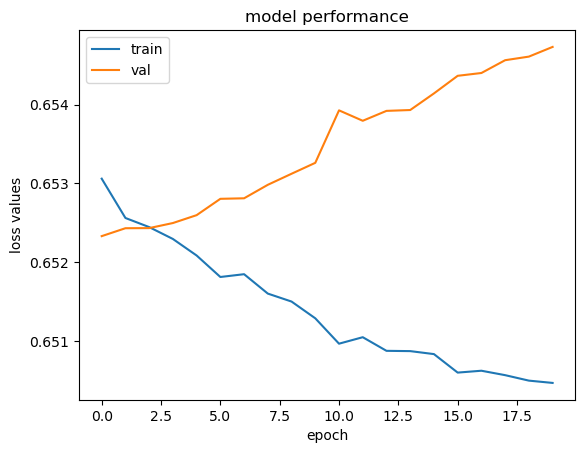

In [79]:
plt.plot(best_mlp_model_2.history_['loss'])
plt.plot(best_mlp_model_2.history_['val_loss']) 
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()